In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import pickle
import nltk.classify.util
import sys
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


def clean(words):
    return dict([(word, True) for word in words])


negative_ids = movie_reviews.fileids('neg')
positive_ids = movie_reviews.fileids('pos')


negative_features = [(clean(movie_reviews.words(fileids=[f])), 'negative') for f in negative_ids]
positive_features = [(clean(movie_reviews.words(fileids=[f])), 'positive') for f in positive_ids]


negative_cutoff = int(len(negative_features) * 95/100)
positive_cutoff = int(len(positive_features) * 90/100)

train_features = negative_features[:negative_cutoff] + positive_features[:positive_cutoff]
test_features = negative_features[negative_cutoff:] + positive_features[positive_cutoff:]

print('Training on %d data, testing on %d data' % (len(train_features), len(test_features)))
classifier = NaiveBayesClassifier.train(train_features)
print('Training complete')
print('accuracy:', nltk.classify.util.accuracy(classifier, test_features)*100,'%')
classifier.show_most_informative_features()


f = open('model', 'wb')
pickle.dump(classifier, f)
f.close()

Training on 1850 data, testing on 150 data
Training complete
accuracy: 81.33333333333333 %
Most Informative Features
             outstanding = True           positi : negati =     16.4 : 1.0
               ludicrous = True           negati : positi =     13.5 : 1.0
              astounding = True           positi : negati =     13.0 : 1.0
                  avoids = True           positi : negati =     13.0 : 1.0
                 idiotic = True           negati : positi =     12.3 : 1.0
             fascination = True           positi : negati =     11.6 : 1.0
               atrocious = True           negati : positi =     11.1 : 1.0
                  symbol = True           positi : negati =     10.9 : 1.0
                  annual = True           positi : negati =     10.2 : 1.0
                  hudson = True           negati : positi =      9.8 : 1.0


In [2]:
f = open('model', 'rb')
classifier = pickle.load(f)
f.close()



sentence="i don't love you "
features = clean(sentence)
print(classifier.classify(features))

sentence="i love you sweetheart "
features = clean(sentence)
print(classifier.classify(features))


sentence="i am not saying that i don't love you"
features = clean(sentence)
print(classifier.classify(features))

sentence="This size of laptop is very bad"
features = clean(sentence)
print(classifier.classify(features))



negative
positive
positive
negative


In [3]:
opinion={}

f=open('r.txt','r')
pos,neg=0,0
for line in f:
    try:
        chat=line.split('-')[1].split(':')[1]
        name=line.split('-')[1].split(':')[0]
        if opinion.get(name,None) is None:
            opinion[name]=[0,0]
        res=classifier.classify(clean(chat))
        print(name,res,chat)
        if res=='positive':
            pos+=1
            opinion[name][0]+=1
        else:
            neg+=1
            opinion[name][1]+=1
    except:
        pass
print("positive: {} \nNegative: {}".format(pos,neg))

 Vineet negative  No

 Badal positive  Don't  be foolish bro just go and participate

 Vinay negative  Never

 Sister positive  Go and try to explore yourself you will meet to great people

 Ankit negative  There are NPTEL exam on 3rd november you have no time

 DJ positive  Wow just go participate in Hackathon for better experience

 Brother positive  This is opportunity just go

 Dad positive  So when are you going? 

 Mom positive  I will prepare food for you

 Vinay positive  Just go

positive: 7 
Negative: 3


<IPython.core.display.Javascript object>


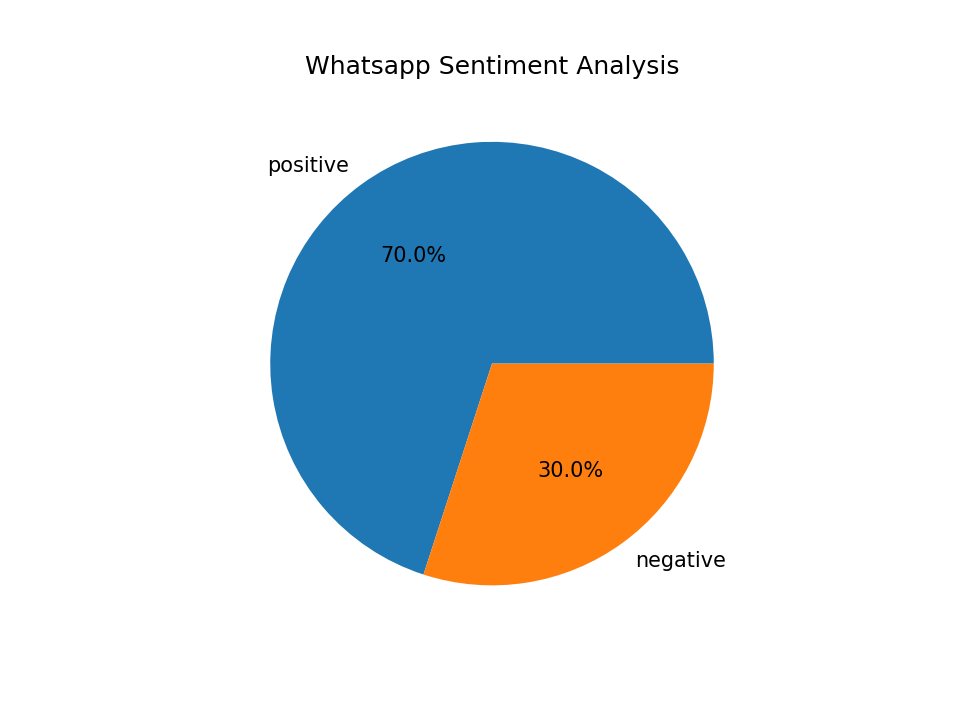

In [4]:
neg=abs(neg)
labels = ['positive','negative']
sizes = [pos,neg]
fig1, ax1 = plt.subplots()
ax1.pie(sizes ,labels=labels, autopct='%1.1f%%')
plt.title('Whatsapp Sentiment Analysis')
plt.show()


In [5]:
names,positive,negative=[],[],[]
for name in opinion:
    names.append(name)
    positive.append(opinion[name][0])
    negative.append(opinion[name][1])
    

In [6]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')


<IPython.core.display.Javascript object>


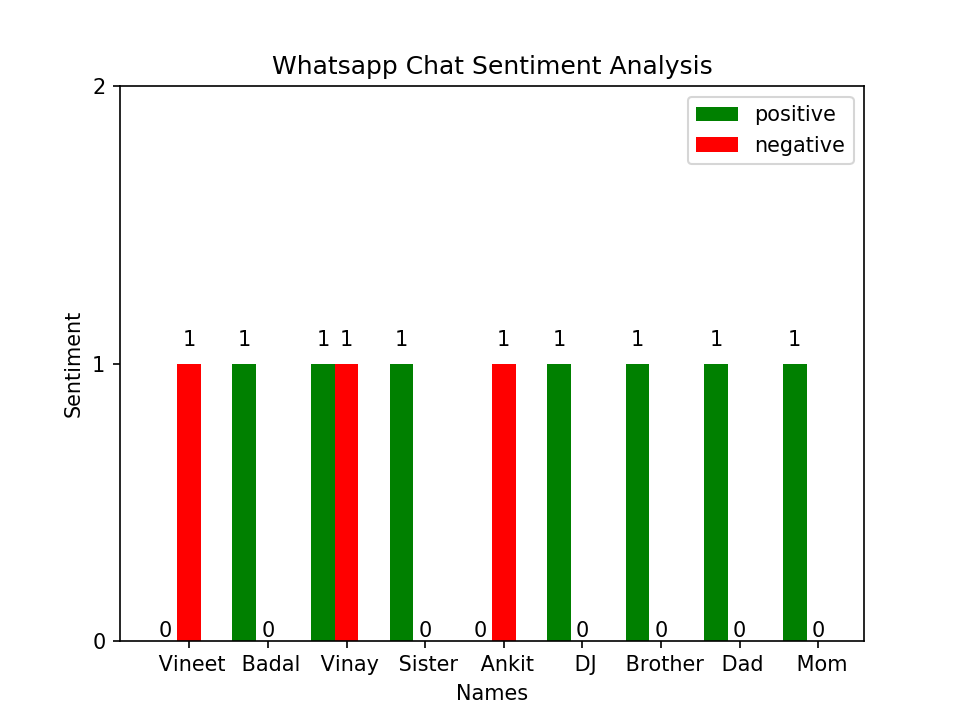

In [7]:
ind = np.arange(len(names))
width=0.3
max_x=max(max(positive),max(negative))+2

fig = plt.figure()
ax = fig.add_subplot()

yvals = positive
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = negative
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_xlabel('Names')
ax.set_ylabel('Sentiment')

ax.set_xticks(ind+width)
ax.set_yticks(np.arange(0,max_x,1))
ax.set_xticklabels( names )
ax.legend( (rects1[0], rects2[0]), ('positive', 'negative') )
ax.set_title('Whatsapp Chat Sentiment Analysis')


autolabel(rects1)
autolabel(rects2)

plt.show()